# กระบวนการทำ Data Analytic
0. จุดประสงค์ของการทำ Data Analytic คืออะไร
1. การเก็บข้อมูล/รวบรวมข้อมูลดิบ *
2. การตั้งคำถาม ตั้งสมมติฐาน 
3. การสร้างฐานข้อมูลเพื่อการวิเคราะห์ (Data Mart)
  - การเลือกข้อมูล
  - การจัดรูปแบบข้อมูล
  - การ clean ข้อมูล
4. การหาคำตอบจากข้อมูล ซึ่งอาจจะได้จากขั้นตอนที่ 3 หรือหา insight เพิ่มเติม
5. ระหว่างการหาคำตอบ จะมีคำถามใหม่เกิดขึ้นมา จนอาจจะนำมาสู่กระบวนการย้อนกลับไปสู่ขั้นตอน 1 หรือ 2
6. การสรุปผล 
** 1 กับ 2 อาจจะสลับกัน บางครั้งเราก็ตั้งคำถามก่อนรวมรวมข้อมูล

#0. ตั้งจุดประสงค์ของการวิเคราะห์ข้อมูล
- ต้องการลดอุบัติเหตุ
-  เพื่อเตรียมตัวในการรับมือหรือเตรียมอุปกรณ์/สภานที่ สำหรับเจ้าหน้าที่ของรัฐ

# 1. การเก็บข้อมูล
ข้อมูลการเกิดอุบัติช่วงวันปีใหม่ ปี2551-2558

In [ ]:
# Install libraries
!pip install pygsheets
!pip install pythainlp

     |████████████████████████████████| 112kB 2.7MB/s 
     |████████████████████████████████| 8.9MB 2.5MB/s 
     |████████████████████████████████| 747kB 39.9MB/s 


In [ ]:
# โค้ดในส่วนของการเชื่อมต่อกับ google sheet
import pygsheets #read googlesheet
import google.auth
from google.colab import auth
import seaborn as sns
import warnings
import pandas as pd

# set maximum row to unlimit
pd.options.display.max_rows = 999
warnings.filterwarnings('ignore')
auth.authenticate_user() #access google
credentials, _ = google.auth.default()
gc = pygsheets.client.Client(credentials)
url = 'https://docs.google.com/spreadsheets/d/1anwLhbanswOBldUut1TiLQQoDKf-kMIQ7PTJi0miR0A/edit?usp=sharing'
sheet = gc.open_by_url(url)
# Get data from google sheet
dat = sheet.sheet1.get_as_df()
dat

,ชื่อเทศกาล,รหัสจังหวัด,จังหวัด,รหัส รพ.,ชื่อโรงพยาบาลที่รับผู้บาดเจ็บ,วันที่เกิดเหตุ,เวลาเกิดเหตุ,เพศ,อายุ,ถนนที่เกิดเหตุ,สถานะ,รถผู้บาดเจ็บ,รถคู่กรณี,มาตรการ,การดื่มสุรา,การนำส่ง,Refer-Admit,ผลการรักษา,จำนวนวันรักษา
0,ปีใหม่ 51,10,กรุงเทพมหานคร,11630,กรุงเทพ,3,12:01-13:00 น.,หญิง,54,ในเมือง,ผู้ชับขี่,รถเก๋ง/แท็กซี่,ไม่มี/ล้มเอง,เข็มขัด,ไม่ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0
1,ปีใหม่ 51,10,กรุงเทพมหานคร,11548,กรุงเทพคริสเตียน,2,21:01-22:00 น.,หญิง,13,ในเมือง,ผู้ชับขี่,จักรยานยนต์,รถตู้,ใส่หมวก,ไม่ดื่ม,มูลนิธิ/อาสาสมัคร,admit,ทุเลา/หาย,0
2,ปีใหม่ 51,10,กรุงเทพมหานคร,11548,กรุงเทพคริสเตียน,31,03:01-04:00 น.,หญิง,0,ในเมือง,ผู้โดยสาร,จักรยานยนต์,ปิคอัพ,ไม่ใส่,ไม่ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0
3,ปีใหม่ 51,10,กรุงเทพมหานคร,11548,กรุงเทพคริสเตียน,31,03:01-04:00 น.,หญิง,0,ในเมือง,ผู้โดยสาร,จักรยานยนต์,ปิคอัพ,ใส่หมวก,ไม่ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0
4,ปีใหม่ 51,10,กรุงเทพมหานคร,11548,กรุงเทพคริสเตียน,31,03:01-04:00 น.,ชาย,0,ในเมือง,ผู้ชับขี่,จักรยานยนต์,ปิคอัพ,ใส่หมวก,ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214945,ปีใหม่ 58,97,บึงกาฬ,11049,ศรีวิไล,31,09:01-10:00 น.,ชาย,3,ชนบท,คนเดินเท้า,ไม่มี/ล้มเอง,จักรยานยนต์,ไม่ใส่,ไม่ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0
214946,ปีใหม่ 58,97,บึงกาฬ,11049,ศรีวิไล,30,16:01-17:00 น.,หญิง,4,ชนบท,คนเดินเท้า,ไม่มี/ล้มเอง,จักรยานยนต์,ไม่ใส่,ไม่ดื่ม,ผู้ประสบเหตุ/ญาติ,ไม่,ทุเลา/หาย,0
214947,ปีใหม่ 58,97,บึงกาฬ,11049,ศรีวิไล,30,24:01-01:00 น.,ชาย,20,ชนบท,ผู้ชับขี่,จักรยานยนต์,ปิคอัพ,ไม่ใส่,ไม่ดื่ม,ALS,ส่งต่อก่อน admit,ทุเลา/หาย,0
214948,ปีใหม่ 58,97,บึงกาฬ,11049,ศรีวิไล,31,14:01-15:00 น.,ชาย,16,ชนบท,ผู้ชับขี่,จักรยานยนต์,ไม่มี/ล้มเอง,ไม่ใส่,ดื่ม,FR,ส่งต่อก่อน admit,ทุเลา/หาย,0


In [ ]:
# แสดงหัวข้อทั้งหมดของฐานข้อมูล
dat.columns

Index(['ชื่อเทศกาล', 'รหัสจังหวัด', 'จังหวัด', 'รหัส รพ.',
       'ชื่อโรงพยาบาลที่รับผู้บาดเจ็บ', 'วันที่เกิดเหตุ', 'เวลาเกิดเหตุ',
       'เพศ', 'อายุ', 'ถนนที่เกิดเหตุ', 'สถานะ', 'รถผู้บาดเจ็บ', 'รถคู่กรณี',
       'มาตรการ', 'การดื่มสุรา', 'การนำส่ง', 'Refer-Admit', 'ผลการรักษา',
       'จำนวนวันรักษา'],
      dtype='object')

# 2. การตั้งคำถาม ตั้งสมมติฐาน ตั้งเป้าหมายของการวิเคราะห์
2.1 ตั้งคำถาม
-  เพื่อเตรียมตัวในการรับมือหรือเตรียมอุปกรณ์/สภานที่ สำหรับเจ้าหน้าที่ของรัฐ
  - อยากรู้จังหวัดที่เสี่ยงเกิดอุบัติเหตุมากที่สุด
  - อยากรู้วันที่เกิดอุบัติเหตุมากที่สุด
  - อยากรู้ช่วงเวลาที่เกิดอุบัติเหตุมากที่สุด
  - อยากรู้ข้อมูลและสถานะของผู้ประสบอุบัติเหตุ

2.2 การตั้งสมมติฐาน
- ผู้ชายจะประสบอุบัติเหตุมากกว่าผู้หญิง
- รถที่เกิดอุบัติเหตุ 50% มาจากรถจักรยานยนต์
- เวลาที่เกิดอุบัติเหตุจะเป็นช่วงค่ำ
- สาเหตุหลักของการเกิดอุบัติเหตุมาจากสุรา
- การใช้อุปกรณ์นิรภัย เช่น หมวกกันน๊อค เข็มขัดนิรภัย ช่วยลดความรุนแรงของอุบัติเหตุที่เกิดขึ้น

2.3 ตั้งเป้าหมาย
- เพื่อนำข้อมูลมาใช้เป็นประโยชน์ต่อเจ้าหน้าที่รัฐในการเตรียมตัว/ปฏิบัติงาน

# 3. การสร้างฐานข้อมูลเพื่อการวิเคราะห์ (Data Mart) (ไล่ลำดับจากข้อ2)


##3.1 จังหวัดที่เกิดอุบัติเหตุ

In [ ]:
datprovince = dat['จังหวัด']
datprovince

0         กรุงเทพมหานคร
1         กรุงเทพมหานคร
2         กรุงเทพมหานคร
3         กรุงเทพมหานคร
4         กรุงเทพมหานคร
              ...      
214945           บึงกาฬ
214946           บึงกาฬ
214947           บึงกาฬ
214948           บึงกาฬ
214949           บึงกาฬ
Name: จังหวัด, Length: 214950, dtype: object

In [ ]:
datprovince.value_counts().head(10) #ได้จำนวนผู้เกิดอุบัติเหตุในแต่ละจังหวัด ใส่.head(10)ไว้เพราะมีรายชื่อจังหวัดเยอะ อาจจะดูยาก เลยขอโชว์แค่Top10พอ

นครราชสีมา       9835
เชียงใหม่        7930
ชลบุรี           7221
ขอนแก่น          6779
บุรีรัมย์        6097
กรุงเทพมหานคร    5921
สงขลา            5397
สุราษฎร์ธานี     5354
เชียงราย         5025
นครศรีธรรมราช    4643
Name: จังหวัด, dtype: int64

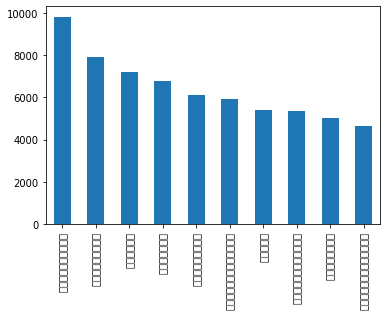

In [ ]:
datprovince.value_counts().head(10).plot.bar() #ได้กราฟจำนวนผู้เกิดอุบัติเหตุในแต่ละจังหวัด

In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], dat['จังหวัด']).style.background_gradient(cmap='YlGnBu') #ได้กราฟจำนวนผู้เกิดอุบัติเหตุในแต่ละจังหวัดตามปี

จังหวัด,กระบี่,กรุงเทพมหานคร,กาญจนบุรี,กาฬสินธุ์,กำแพงเพชร,ขอนแก่น,จันทบุรี,ฉะเชิงเทรา,ชลบุรี,ชัยนาท,ชัยภูมิ,ชุมพร,ตรัง,ตราด,ตาก,นครนายก,นครปฐม,นครพนม,นครราชสีมา,นครศรีธรรมราช,นครสวรรค์,นนทบุรี,นราธิวาส,น่าน,บึงกาฬ,บุรีรัมย์,ปทุมธานี,ประจวบคีรีขันธ์,ปราจีนบุรี,ปัตตานี,พระนครศรีอยุธยา,พะเยา,พังงา,พัทลุง,พิจิตร,พิษณุโลก,ภูเก็ต,มหาสารคาม,มุกดาหาร,ยะลา,ยโสธร,ระนอง,ระยอง,ราชบุรี,ร้อยเอ็ด,ลพบุรี,ลำปาง,ลำพูน,ศรีสะเกษ,สกลนคร,สงขลา,สตูล,สมุทรปราการ,สมุทรสงคราม,สมุทรสาคร,สระบุรี,สระแก้ว,สิงห์บุรี,สุพรรณบุรี,สุราษฎร์ธานี,สุรินทร์,สุโขทัย,หนองคาย,หนองบัวลำภู,อำนาจเจริญ,อุดรธานี,อุตรดิตถ์,อุทัยธานี,อุบลราชธานี,อ่างทอง,เชียงราย,เชียงใหม่,เพชรบุรี,เพชรบูรณ์,เลย,แพร่,แม่ฮ่องสอน
ชื่อเทศกาล,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ปีใหม่ 51,276,1967,346,419,313,908,381,463,1155,152,463,309,384,158,254,154,457,302,1228,645,466,426,157,207,0,830,473,332,364,171,574,275,113,179,280,424,406,287,135,86,230,98,505,519,510,389,441,222,605,449,756,85,606,70,350,526,305,156,394,685,590,214,425,234,127,424,227,196,108,198,643,1082,240,558,387,280,113
ปีใหม่ 52,189,1684,371,359,295,845,420,401,1002,208,431,273,341,94,266,138,425,263,1172,514,555,388,144,194,0,706,388,382,247,86,528,256,161,154,295,369,430,89,120,86,194,101,484,429,139,363,381,193,508,442,550,105,460,84,280,434,312,153,390,557,549,248,311,229,126,336,238,176,186,151,606,937,244,503,341,172,102
ปีใหม่ 53,237,1312,358,396,325,868,372,292,905,151,432,329,436,9,258,158,421,273,1165,640,607,399,180,221,0,714,491,345,290,141,445,278,135,236,238,412,473,125,140,154,192,103,477,419,50,374,407,245,614,474,725,192,518,89,281,378,267,127,408,711,526,268,392,245,80,507,218,156,31,136,653,862,268,474,380,206,122
ปีใหม่ 54,179,937,286,343,180,912,380,375,925,185,113,258,295,76,237,138,383,300,1216,553,519,363,150,201,0,835,441,365,257,125,506,264,141,165,205,405,480,130,114,102,204,85,455,469,65,341,368,260,561,374,675,83,502,76,303,442,268,121,363,606,563,193,409,237,72,342,250,148,118,135,642,855,236,499,283,215,141
ปีใหม่ 55,238,0,316,287,184,857,501,387,823,164,154,238,365,31,289,122,454,289,1322,574,536,381,105,246,0,736,411,337,293,134,458,285,137,203,221,367,475,365,116,151,212,100,547,447,445,350,423,266,564,373,680,81,499,6,292,435,263,125,368,618,512,182,447,269,87,337,173,187,103,142,663,992,270,507,248,254,112
ปีใหม่ 56,210,0,320,325,223,916,387,438,736,179,211,243,367,117,228,131,429,333,1315,548,533,323,184,199,205,844,43,330,280,139,500,276,43,176,220,429,520,333,139,126,210,105,576,489,560,320,425,215,605,365,658,89,570,103,297,403,304,119,384,761,582,196,176,245,56,492,217,180,162,170,623,1161,241,505,286,185,116
ปีใหม่ 57,239,0,365,269,248,777,345,413,823,148,157,263,384,126,228,134,413,319,1274,592,514,300,129,200,167,798,30,342,299,139,484,215,30,217,243,449,571,351,128,116,232,132,498,398,553,336,289,293,564,342,760,110,554,70,370,444,260,104,381,757,665,150,226,243,125,516,196,136,44,131,556,995,250,464,266,195,126
ปีใหม่ 58,200,21,341,366,261,696,347,328,852,162,153,205,333,160,214,122,377,223,1143,577,465,254,144,200,163,634,20,361,231,104,351,242,65,190,230,316,522,330,89,107,184,88,480,395,544,301,359,199,492,370,593,88,383,92,311,313,222,92,388,659,522,226,205,232,123,493,190,187,120,173,639,1046,314,433,242,173,147


In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], dat['จังหวัด']).max().max() #ได้จำนวนผู้เกิดอุบัติเหตุในแต่ละจังหวัดตามปีมากที่สุด

1967

** ***** ยังไม่ได้ลงฟ้อนไทย**

**สรุป** 



*   จังหวัดที่เกิดอุบัติเหตุต่อเนื่องมากที่สุดตั้งแต่ปี 2551 - 2558 คือ นครราชสีมา
*   แต่หากมองเป็นรายปี จังหวัดที่เกิดอุบัติเหตุมากสุดคือ กรุงเทพมหานคร    ในปี2551 

อาจสรุปได้ว่า กรุงเทพมหานคร มีการจัดการกับอุบัติเหตุที่ดีขึ้น เพราะตั้งแต่ปี51 มีจำนวนการเกิดอุบัติเหตุที่ลดลงมา 
แต่นครราชสีมา ต้องรีบเข้าไปจัดการในเรื่องของการควบคุมอุบัติเหตุอย่างเร่งด่วน เพราะมีจำนวนการเกิดอุบัติต่อเนื่องมากที่สุด 
***ตรงนี้ทำกราฟของกทมกับนครราชสีมาเพิ่มได้นะครับ
    


##3.2 ข้อมูลวันที่เกิดอุบัติเหตุ

In [ ]:
datday = dat['วันที่เกิดเหตุ']
datday

0          3
1          2
2         31
3         31
4         31
          ..
214945    31
214946    30
214947    30
214948    31
214949     5
Name: วันที่เกิดเหตุ, Length: 214950, dtype: int64

In [ ]:
datday.value_counts() #ได้จำนวนผู้เกิดอุบัติเหตุในแต่ละวัน

31    41940
1     39444
30    35324
2     24857
29    23033
3     16301
4     12038
28    11550
27     6247
5      4215
0         1
Name: วันที่เกิดเหตุ, dtype: int64

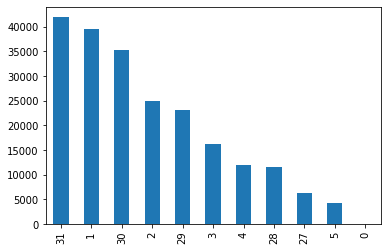

In [ ]:
datday.value_counts().plot.bar() #นำจำนวนผู้เกิดอุบัติเหตุในแต่ละวันมาพอตกราฟ 

In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], dat['วันที่เกิดเหตุ']).style.background_gradient(cmap='YlGnBu') #ได้กราฟจำนวนผู้เกิดอุบัติเหตุในแต่ละวันตามปี

วันที่เกิดเหตุ,0,1,2,3,4,5,27,28,29,30,31
ชื่อเทศกาล,,,,,,,,,,,
ปีใหม่ 51,0,5280,3113,2360,0,0,0,4119,4871,5279,5844
ปีใหม่ 52,0,5682,3467,2806,2787,2151,0,0,0,4494,5896
ปีใหม่ 53,0,5332,3548,2972,2311,0,0,0,3559,4729,5485
ปีใหม่ 54,0,4900,3221,2708,2151,0,0,0,3158,4508,5352
ปีใหม่ 55,0,4828,3191,2795,2233,0,0,0,3463,4388,5233
ปีใหม่ 56,0,4525,2699,0,0,0,2925,3629,4168,4121,4582
ปีใหม่ 57,1,4178,2649,0,0,0,3322,3802,3814,3721,4483
ปีใหม่ 58,0,4719,2969,2660,2556,2064,0,0,0,4084,5065


In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], dat['วันที่เกิดเหตุ']).max().max() #ได้จำนวนผู้เกิดอุบัติเหตุในแต่ละวันตามปีมากที่สุด

5896

**สรุป** 

*  วันที่ที่เกิดอุบัติเหตุต่อเนื่องมากที่สุดตั้งแต่ปี 2551 - 2558 คือวันที่ 31


*  แต่ถ้ามองเป็นรายปี วันที่เกิดอุบัติเหตุมากสุดคือ วันที่31 ในปี2551

สรุปได้อย่างชัดเจนว่า วันที่ควรเฝ้าระวังมากสุด คือวันที่31



## 3.3 ข้อมูลช่วงเวลาที่เกิดเหตุ

In [ ]:
dattime = dat['เวลาเกิดเหตุ']
dattime

0         12:01-13:00 น.
1         21:01-22:00 น.
2         03:01-04:00 น.
3         03:01-04:00 น.
4         03:01-04:00 น.
               ...      
214945    09:01-10:00 น.
214946    16:01-17:00 น.
214947    24:01-01:00 น.
214948    14:01-15:00 น.
214949    15:01-16:00 น.
Name: เวลาเกิดเหตุ, Length: 214950, dtype: object

In [ ]:
dattime.value_counts() #ได้จำนวนผู้เกิดอุบัติเหตุในแต่ละช่วงเวลา

18:01-19:00 น.    16816
17:01-18:00 น.    16490
16:01-17:00 น.    15286
19:01-20:00 น.    14276
15:01-16:00 น.    12368
20:01-21:00 น.    11872
14:01-15:00 น.    10718
13:01-14:00 น.    10066
12:01-13:00 น.    10026
21:01-22:00 น.     9818
11:01-12:00 น.     9212
24:01-01:00 น.     8734
10:01-11:00 น.     8686
22:01-23:00 น.     8345
08:01-09:00 น.     7655
09:01-10:00 น.     7562
23:01-24:00 น.     6635
01:01-02:00 น.     6173
07:01-08:00 น.     5842
02:01-03:00 น.     4765
03:01-04:00 น.     3499
06:01-07:00 น.     3093
04:01-05:00 น.     2714
05:01-06:00 น.     2526
ไม่ทราบ            1773
Name: เวลาเกิดเหตุ, dtype: int64

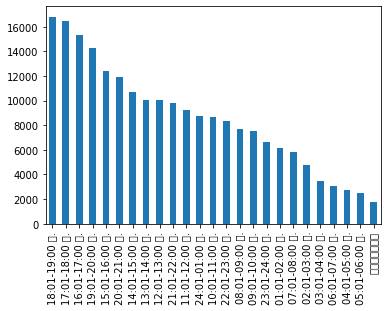

In [ ]:
dattime.value_counts().plot.bar() #นำจำนวนผู้เกิดอุบัติเหตุในแต่ละช่วงเวลามาพอตกราฟ 

In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], dat['เวลาเกิดเหตุ']).style.background_gradient(cmap='YlGnBu') #ได้กราฟจำนวนผู้เกิดอุบัติเหตุในแต่ละเวลาตามปี

เวลาเกิดเหตุ,01:01-02:00 น.,02:01-03:00 น.,03:01-04:00 น.,04:01-05:00 น.,05:01-06:00 น.,06:01-07:00 น.,07:01-08:00 น.,08:01-09:00 น.,09:01-10:00 น.,10:01-11:00 น.,11:01-12:00 น.,12:01-13:00 น.,13:01-14:00 น.,14:01-15:00 น.,15:01-16:00 น.,16:01-17:00 น.,17:01-18:00 น.,18:01-19:00 น.,19:01-20:00 น.,20:01-21:00 น.,21:01-22:00 น.,22:01-23:00 น.,23:01-24:00 น.,24:01-01:00 น.,ไม่ทราบ
ชื่อเทศกาล,,,,,,,,,,,,,,,,,,,,,,,,,
ปีใหม่ 51,919,717,531,416,340,373,743,981,1026,1165,1214,1427,1350,1509,1685,2139,2382,2415,2247,1783,1506,1356,1076,1293,273
ปีใหม่ 52,815,628,433,331,347,440,725,883,911,1088,1204,1220,1280,1377,1537,1998,2125,2114,1811,1494,1238,1096,873,1132,183
ปีใหม่ 53,816,658,460,348,341,403,838,1038,1001,1209,1137,1240,1259,1337,1682,1917,2087,2061,1844,1616,1292,1073,918,1102,259
ปีใหม่ 54,718,561,422,342,332,394,712,955,905,1013,1153,1141,1119,1272,1588,1866,1887,2130,1783,1445,1251,1027,792,997,193
ปีใหม่ 55,752,611,385,340,303,407,802,1055,946,1076,1155,1209,1260,1305,1446,1804,1937,2030,1694,1395,1132,1004,763,1077,243
ปีใหม่ 56,696,499,473,347,318,356,720,1043,999,1021,1119,1301,1266,1333,1532,1981,2011,2110,1792,1448,1228,961,791,1097,207
ปีใหม่ 57,741,550,394,322,303,376,604,816,824,1050,1149,1255,1334,1421,1529,1881,2004,2092,1614,1460,1227,1006,752,1060,206
ปีใหม่ 58,716,541,401,268,242,344,698,884,950,1064,1081,1233,1198,1164,1369,1700,2057,1864,1491,1231,944,822,670,976,209


In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], dat['เวลาเกิดเหตุ']).max().max() #ได้จำนวนผู้เกิดอุบัติเหตุในแต่ละเวลาตามปีมากที่สุด

2415

**สรุป**


*   ช่วงเวลาที่เกิดอุบัติเหตุมากสุดตั้งแต่ปี 2551 - 2558 คือ 18.00 - 19.00น.
*   แต่ถ้ามองเป็นรายปี ช่วงเวลาที่เกิดอุบัติเหตุมากสุดก็ยังคงเป็น 18.00 - 19.00น. ในปี2551



## 3.4 ข้อมูลสถานะ

In [ ]:
datstatus = dat['สถานะ']
datstatus

0          ผู้ชับขี่
1          ผู้ชับขี่
2          ผู้โดยสาร
3          ผู้โดยสาร
4          ผู้ชับขี่
             ...    
214945    คนเดินเท้า
214946    คนเดินเท้า
214947     ผู้ชับขี่
214948     ผู้ชับขี่
214949     ผู้ชับขี่
Name: สถานะ, Length: 214950, dtype: object

In [ ]:
datstatus.value_counts() #ได้จำนวนผู้เกิดอุบัติเหตุในแต่ละสถานะ

ผู้ชับขี่     149667
ผู้โดยสาร      55866
คนเดินเท้า      7410
ไม่ทราบ         2007
Name: สถานะ, dtype: int64

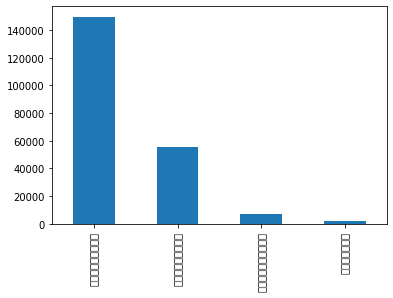

In [ ]:
datstatus.value_counts().plot.bar() #นำจำนวนผู้เกิดอุบัติเหตุในแต่ละสถานะมาพอตกราฟ 

In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], dat['สถานะ']).style.background_gradient(cmap='YlGnBu') #ได้กราฟจำนวนผู้เกิดอุบัติเหตุในแต่ละสถานะตามปี

สถานะ,คนเดินเท้า,ผู้ชับขี่,ผู้โดยสาร,ไม่ทราบ
ชื่อเทศกาล,,,,
ปีใหม่ 51,1146,21140,8333,247
ปีใหม่ 52,1077,18629,7335,242
ปีใหม่ 53,997,19159,7500,280
ปีใหม่ 54,907,18146,6720,225
ปีใหม่ 55,859,18226,6788,258
ปีใหม่ 56,812,18773,6780,284
ปีใหม่ 57,829,18452,6454,235
ปีใหม่ 58,783,17142,5956,236


In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], dat['สถานะ']).max().max() #ได้จำนวนผู้เกิดอุบัติเหตุในแต่ละเวลาตามปีมากที่สุด

21140

**สรุป**


*  สถานะที่เกิดอุบัติเหตุมากสุดตั้งแต่ปี 2551 - 2558 คือ ผู้ขับขี่
*   แต่ถ้ามองเป็นรายปี สถานะที่เกิดอุบัติเหตุมากสุดก็ยังคงเป็น ผู้ขับขี่ ในปี2551

สรุป ควรโฟกัสไปที่การเพิ่มนโยบาย หรือ การเพิ่มกฏ ให้ผู้ขับขี่ระมัดระวังในช่วงปีใหม่ **** ต้องเอาไปโยงกับกราฟการดื่มสุรา จะได้รู้ว่าจริงๆแล้ว ผู้ขับขี่นั้น ส่วนใหญ่เมาสุราด้วยหรือไม่


In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], dat['การดื่มสุรา']).style.background_gradient(cmap='YlGnBu')

การดื่มสุรา,ดื่ม,ไม่ดื่ม,ไม่ทราบ
ชื่อเทศกาล,,,
ปีใหม่ 51,11676,16994,2196
ปีใหม่ 52,9947,15471,1865
ปีใหม่ 53,9507,16612,1817
ปีใหม่ 54,9103,15270,1625
ปีใหม่ 55,8656,15962,1513
ปีใหม่ 56,9243,15962,1444
ปีใหม่ 57,9454,15060,1456
ปีใหม่ 58,7834,14946,1337


## 3.5 ข้อมูลการดื่มสุรา

In [ ]:
datdrunk = dat['การดื่มสุรา']
datdrunk

0         ไม่ดื่ม
1         ไม่ดื่ม
2         ไม่ดื่ม
3         ไม่ดื่ม
4            ดื่ม
           ...   
214945    ไม่ดื่ม
214946    ไม่ดื่ม
214947    ไม่ดื่ม
214948       ดื่ม
214949    ไม่ดื่ม
Name: การดื่มสุรา, Length: 214950, dtype: object

In [ ]:
datdrunk.value_counts() #ได้จำนวนผู้เกิดอุบัติเหตุว่าดื่มสุราหรือไม่

ไม่ดื่ม    126277
ดื่ม        75420
ไม่ทราบ     13253
Name: การดื่มสุรา, dtype: int64

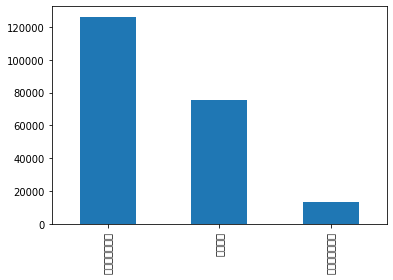

In [ ]:
datdrunk.value_counts().plot.bar() #นำจำนวนผู้เกิดอุบัติเหตุว่าดื่มสุราหรือไม่มาพอตกราฟ 

In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], dat['การดื่มสุรา']).style.background_gradient(cmap='YlGnBu') #ได้กราฟจำนวนผู้เกิดอุบัติเหตุว่าดื่มสุราหรือไม่ตามปี

การดื่มสุรา,ดื่ม,ไม่ดื่ม,ไม่ทราบ
ชื่อเทศกาล,,,
ปีใหม่ 51,11676,16994,2196
ปีใหม่ 52,9947,15471,1865
ปีใหม่ 53,9507,16612,1817
ปีใหม่ 54,9103,15270,1625
ปีใหม่ 55,8656,15962,1513
ปีใหม่ 56,9243,15962,1444
ปีใหม่ 57,9454,15060,1456
ปีใหม่ 58,7834,14946,1337


In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], dat['การดื่มสุรา']).max().max() #ได้จำนวนผู้เกิดอุบัติเหตุว่าดื่มสุราหรือไม่ตามปีมากที่สุด

16994

**สรุป**


*  ตั้งแต่ปี 2551 - 2558 ผู้ที่เกิดอุบัติเหตุมากสุดคือผู้ไม่ดื่มสุรา
*   แต่ถ้ามองเป็นรายปี สถานะที่เกิดอุบัติเหตุมากสุดก็ยังคงเป็น ผู้ไม่ดื่มสุรา ในปี2551

สรุป ปกติเราอาจไปโฟกัสกับผู้ที่ดื่มสุราเป็นหลัก แต่จริงๆเราควรโฟกัสกับผู้ขับขี่ ใช้รถใช้ถนนทุกคน มีกฏหมาย หรือนโยบายอะไรบางอย่าง ???? 


## 3.6 ข้อมูลอายุ

In [ ]:
datage = dat['อายุ']
datage

0         54
1         13
2          0
3          0
4          0
          ..
214945     3
214946     4
214947    20
214948    16
214949    19
Name: อายุ, Length: 214950, dtype: int64

In [ ]:
datage.value_counts() #ได้จำนวนผู้เกิดอุบัติเหตุในแต่ละอายุ

17    8846
18    8770
16    8614
15    7924
19    7693
20    7326
14    6376
22    5904
21    5878
23    5757
25    5452
24    5240
26    4752
30    4609
27    4496
28    4462
13    4317
29    4235
0     4062
31    3895
32    3829
35    3585
33    3433
34    3358
36    3267
40    3169
38    2945
37    2935
39    2823
42    2789
41    2692
45    2651
12    2610
43    2533
44    2479
46    2357
48    2304
50    2259
47    2219
49    1923
51    1921
52    1903
11    1835
53    1781
54    1654
55    1594
3     1539
4     1481
56    1448
2     1410
5     1403
57    1395
10    1374
7     1294
6     1290
58    1263
8     1205
9     1176
60    1168
59    1080
62     914
61     908
1      899
63     825
64     712
65     688
66     589
67     540
70     513
68     499
69     436
72     407
71     406
73     381
74     334
75     279
76     277
99     249
77     222
78     179
79     149
80     147
81      89
82      82
83      62
84      51
85      44
86      22
87      17
88      11
90       8

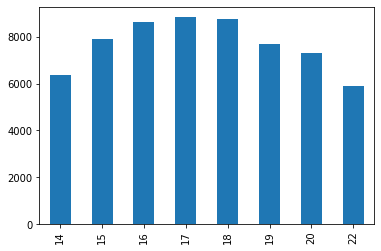

In [ ]:
datage.value_counts().head(8).sort_index().plot.bar() #หาช่วงอายุที่เกิดอุบัติเหตุมากที่สุด

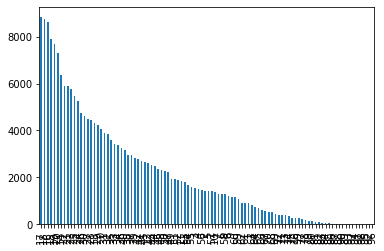

In [ ]:
datage.value_counts().plot.bar() #นำจำนวนผู้เกิดอุบัติเหตุในแต่ละอายุมาพอตกราฟ 

In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], dat['อายุ']).style.background_gradient(cmap='YlGnBu') #ได้กราฟจำนวนผู้เกิดอุบัติเหตุอายุต่างๆตามปี

อายุ,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
ชื่อเทศกาล,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ปีใหม่ 51,846,129,204,230,210,208,180,194,187,199,213,273,382,571,802,1202,1258,1381,1313,1091,1115,905,972,916,823,910,751,721,693,586,742,585,538,494,529,549,452,399,413,400,457,334,368,329,322,380,292,266,278,238,272,195,225,219,167,183,165,151,147,118,133,83,82,92,67,74,62,51,61,47,55,37,50,34,32,22,24,28,24,14,12,12,10,7,5,7,3,3,2,2,0,0,1,1,0,0,1,0,2,54
ปีใหม่ 52,596,114,171,193,195,187,178,169,147,131,192,278,344,562,911,1015,1048,1120,1117,1018,929,734,758,783,731,729,698,648,651,597,569,503,500,405,410,432,418,404,360,354,385,368,341,300,313,315,278,263,296,206,240,227,218,210,162,168,136,121,141,109,113,89,94,75,85,73,67,65,50,58,64,42,45,39,40,31,34,22,18,20,14,8,8,8,3,6,1,1,1,1,1,1,1,0,0,0,0,2,0,7
ปีใหม่ 53,510,128,209,219,179,193,151,178,154,159,195,262,409,573,858,1007,1115,1162,1197,1044,957,724,744,750,681,749,637,627,586,617,629,482,567,447,405,487,399,367,361,371,438,337,352,308,309,295,265,277,271,259,290,221,243,221,198,184,162,166,139,128,131,91,110,96,89,74,58,65,61,54,73,48,54,40,41,26,31,23,20,12,16,11,10,8,6,2,4,3,1,0,2,1,0,0,1,0,0,1,0,121
ปีใหม่ 54,532,114,177,191,179,180,160,158,144,127,142,189,287,573,776,989,1008,1050,1078,979,879,706,674,640,647,648,588,570,535,527,548,471,442,444,393,413,416,370,367,355,400,326,344,339,305,341,301,283,284,222,264,239,209,213,195,190,162,153,153,132,143,110,102,98,67,63,70,71,59,54,58,53,40,55,32,33,19,22,14,21,10,9,13,5,7,3,2,1,0,1,0,0,0,0,0,0,0,0,0,42
ปีใหม่ 55,465,102,167,177,201,184,163,139,128,160,158,217,271,557,811,1028,1094,1014,1028,887,840,742,645,671,595,651,599,493,491,502,571,472,456,436,392,403,404,335,367,323,364,322,336,328,309,347,309,300,291,252,290,294,278,216,247,206,188,195,157,143,153,128,129,93,94,92,91,81,57,46,65,49,42,44,48,24,31,30,20,21,21,14,10,3,5,5,2,3,1,1,0,0,0,1,1,0,0,0,1,14
ปีใหม่ 56,323,113,179,184,186,172,143,166,172,140,175,194,308,493,809,998,1144,1090,1060,863,933,715,705,670,585,623,513,515,545,502,582,469,447,415,430,465,397,342,386,333,392,355,368,346,294,360,323,299,346,246,305,256,246,244,235,219,223,196,169,161,173,135,139,126,97,108,73,77,63,53,64,55,50,57,50,47,43,34,30,19,28,7,12,9,10,5,2,2,3,1,2,0,0,1,0,0,0,0,0,7
ปีใหม่ 57,409,102,165,141,177,143,170,148,133,129,147,217,303,499,693,856,991,981,991,918,859,745,732,743,604,610,526,484,554,481,555,496,482,460,405,432,447,374,363,359,366,336,364,302,298,325,314,267,307,259,301,246,233,244,254,222,207,212,203,139,181,126,115,133,116,89,92,55,69,58,60,56,62,54,46,44,43,29,26,19,13,14,7,10,7,8,6,3,1,0,1,0,0,0,1,0,0,0,0,3
ปีใหม่ 58,381,97,138,204,154,136,145,142,140,131,152,205,306,489,716,829,956,1048,986,893,814,607,674,584,574,532,440,438,407,423,413,417,397,332,394,404,334,344,328,328,367,314,316,281,329,288,275,264,231,241,297,243,251,214,196,222,205,201,154,150,141,146,143,112,97,115,76,75,79,66,74,66,64,58,45,52,52,34,27,23,33,14,12,12,8,8,2,1,2,1,2,1,0,2,0,2,0,0,0,1


In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], dat['อายุ']).max().max() #ได้จำนวนผู้เกิดอุบัติเหตุอายุต่างๆตามปีมากที่สุด

1381

**สรุป**


*  ตั้งแต่ปี 2551 - 2558 ผู้ที่เกิดอุบัติเหตุมากสุดมีอายุอยู่ในช่วง 14 - 22 ปี โดยอายุที่มากที่สุดคือ 17 ปี
*   แต่ถ้ามองเป็นรายปี อายุที่เกิดอุบัติเหตุมากสุดก็ยังคงเป็น 17ปี ในปี2551

สรุป ผู้ที่เกิดอุบัติเหตุส่วนใหญ่มีอายุค่อนข้างน้อย ละยังไม่บรรลุนิติภาวะ ......


## 3.7 ข้อมูลเพศ

In [ ]:
datgender = dat['เพศ']
datgender

0         หญิง
1         หญิง
2         หญิง
3         หญิง
4          ชาย
          ... 
214945     ชาย
214946    หญิง
214947     ชาย
214948     ชาย
214949     ชาย
Name: เพศ, Length: 214950, dtype: object

In [ ]:
datgender.value_counts() #ได้จำนวนผู้เกิดอุบัติเหตุในแต่ละเพศ

ชาย     145146
หญิง     69804
Name: เพศ, dtype: int64

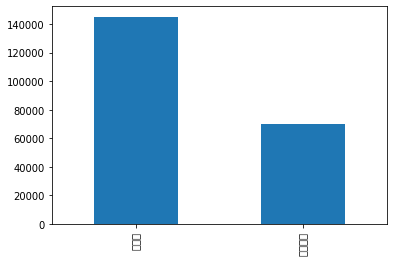

In [ ]:
datgender.value_counts().plot.bar() #นำจำนวนผู้เกิดอุบัติเหตุในแต่ละเพศมาพอตกราฟ 

In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], dat['เพศ']).style.background_gradient(cmap='YlGnBu') #ได้กราฟจำนวนผู้เกิดอุบัติเหตุในแต่เพศตามปี

เพศ,ชาย,หญิง
ชื่อเทศกาล,,
ปีใหม่ 51,21466,9400
ปีใหม่ 52,18619,8664
ปีใหม่ 53,18764,9172
ปีใหม่ 54,17456,8542
ปีใหม่ 55,17241,8890
ปีใหม่ 56,17910,8739
ปีใหม่ 57,17752,8218
ปีใหม่ 58,15938,8179


In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], dat['เพศ']).max()

เพศ
ชาย     21466
หญิง     9400
dtype: int64

**สรุป**


*  เพศที่เกิดอุบัติเหตุมากสุดตั้งแต่ปี 2551 - 2558 คือ เพศชาย
*  แต่ถ้ามองเป็นรายปี สถานะที่เกิดอุบัติเหตุมากสุดก็ยังคงเป็น เพศชาย ในปี2551

สรุป ผู้เกิดอุบัติเหตุส่วนใหญ่เป็นเพศชาย ดังนั้น..


In [ ]:
pd.crosstab(dat['สถานะ'], dat['อายุ']).max().max()

6453

## 3.8 ข้อมูลมาตรการ

In [ ]:
datsafety = dat['มาตรการ']
datsafety

0         เข็มขัด
1         ใส่หมวก
2          ไม่ใส่
3         ใส่หมวก
4         ใส่หมวก
           ...   
214945     ไม่ใส่
214946     ไม่ใส่
214947     ไม่ใส่
214948     ไม่ใส่
214949    ใส่หมวก
Name: มาตรการ, Length: 214950, dtype: object

In [ ]:
datsafety = datsafety.replace('เข็มขัด','ใส่หมวก/เข็มขัด')
datsafety = datsafety.replace('ใส่หมวก','ใส่หมวก/เข็มขัด')
datsafety.value_counts() #ได้จำนวนผู้เกิดอุบัติเหตุที่ใส่และไม่ใส่อุปกรณ์นิรภัย

ไม่ใส่             164436
ใส่หมวก/เข็มขัด     37657
ไม่ทราบ             12857
Name: มาตรการ, dtype: int64

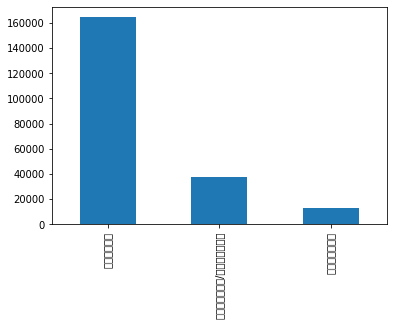

In [ ]:
datsafety.value_counts().plot.bar() #นำจำนวนผู้เกิดอุบัติเหตุในแต่ละมาตรการมาพอตกราฟ 

In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], datsafety).style.background_gradient(cmap='YlGnBu') #ได้กราฟจำนวนผู้เกิดอุบัติเหตุในแต่ละมาตรการตามปี

มาตรการ,ใส่หมวก/เข็มขัด,ไม่ทราบ,ไม่ใส่
ชื่อเทศกาล,,,
ปีใหม่ 51,5169,2238,23459
ปีใหม่ 52,4772,1878,20633
ปีใหม่ 53,4880,1805,21251
ปีใหม่ 54,4561,1564,19873
ปีใหม่ 55,4782,1405,19944
ปีใหม่ 56,4708,1324,20617
ปีใหม่ 57,4574,1475,19921
ปีใหม่ 58,4211,1168,18738


In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], datsafety).max().max()

23459

**สรุป**

*  ผู้ที่เกิดอุบัติเหตุมากสุดตั้งแต่ปี 2551 - 2558 คือ ผู้ที่ไม่มีมาตรการป้องกันความปลอดภัย
*  แต่ถ้ามองเป็นรายปี สถานะที่เกิดอุบัติเหตุมากสุดก็ยังคงเป็น ผู้ที่ไม่มีมาตรการป้องกันความปลอดภัย ในปี2551

สรุป การใช้อุปกรณ์นิรภัย เช่น หมวกกันน๊อค เข็มขัดนิรภัย ช่วยลดความรุนแรงของอุบัติเหตุที่เกิดขึ้น


In [ ]:
pd.crosstab(dat['สถานะ'], dat['อายุ']).max().max()

6453

## 3.9 ข้อมูลรถผู้บาดเจ็บ

In [ ]:
datvehicle = dat['รถผู้บาดเจ็บ']
datvehicle

0         รถเก๋ง/แท็กซี่
1            จักรยานยนต์
2            จักรยานยนต์
3            จักรยานยนต์
4            จักรยานยนต์
               ...      
214945      ไม่มี/ล้มเอง
214946      ไม่มี/ล้มเอง
214947       จักรยานยนต์
214948       จักรยานยนต์
214949       จักรยานยนต์
Name: รถผู้บาดเจ็บ, Length: 214950, dtype: object

In [ ]:
datvehicle.value_counts() #ได้จำนวนผู้เกิดอุบัติเหตุในแต่ละมาตรการ

จักรยานยนต์       170992
ปิคอัพ             12902
รถจักรยาน           9814
ไม่มี/ล้มเอง        6474
รถเก๋ง/แท็กซี่      6150
อื่นๆ               2145
สามล้อเครื่อง       1906
ไม่ทราบ             1220
รถตู้               1102
รถโดยสารใหญ่         874
รถบรรทุก             651
รถโดยสาร 4 ล้อ       535
สามล้อถีบ            185
Name: รถผู้บาดเจ็บ, dtype: int64

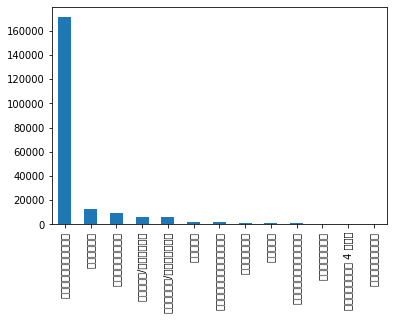

In [ ]:
datvehicle.value_counts().plot.bar() #นำจำนวนผู้เกิดอุบัติเหตุในแต่ละมาตรการมาพอตกราฟ 

In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], dat['รถผู้บาดเจ็บ']).style.background_gradient(cmap='YlGnBu') #ได้กราฟจำนวนผู้เกิดอุบัติเหตุในแต่ละมาตรการตามปี

รถผู้บาดเจ็บ,จักรยานยนต์,ปิคอัพ,รถจักรยาน,รถตู้,รถบรรทุก,รถเก๋ง/แท็กซี่,รถโดยสาร 4 ล้อ,รถโดยสารใหญ่,สามล้อถีบ,สามล้อเครื่อง,อื่นๆ,ไม่ทราบ,ไม่มี/ล้มเอง
ชื่อเทศกาล,,,,,,,,,,,,,
ปีใหม่ 51,24674,1677,1544,91,101,753,97,79,38,255,369,232,956
ปีใหม่ 52,21583,1507,1293,112,52,672,87,186,22,204,374,200,991
ปีใหม่ 53,22162,1676,1250,153,94,758,40,110,29,239,384,177,864
ปีใหม่ 54,20869,1454,1101,114,76,677,54,144,28,211,316,154,800
ปีใหม่ 55,20792,1808,1039,176,102,751,84,58,14,232,190,121,764
ปีใหม่ 56,21337,1801,1174,139,61,739,54,116,16,235,143,105,729
ปีใหม่ 57,20326,1652,1188,216,93,996,65,102,18,301,193,113,707
ปีใหม่ 58,19249,1327,1225,101,72,804,54,79,20,229,176,118,663


In [ ]:
pd.crosstab(dat['ชื่อเทศกาล'], dat['รถผู้บาดเจ็บ']).max().max()

24674

**สรุป**

*  รถที่เกิดอุบัติเหตุมากสุดตั้งแต่ปี 2551 - 2558 คือ รถจักรยานยนต์
*  แต่ถ้ามองเป็นรายปี สถานะที่เกิดอุบัติเหตุมากสุดก็ยังคงเป็น รถจักรยานยนต์ ในปี2551

สรุป รถจักรยานยนต์ เกิดอุบัติเหตุมากที่สุด ดังนั้น ...


## 3.10 ข้อมูลผลการรักษา

In [ ]:
dat['ผลการรักษา'].value_counts()

ทุเลา/หาย                        211386
ตายที่เกิดเหตุ                     2137
ตายที่ห้องฉุกเฉิน                   492
ตายในตึกภายใน 24 ชม. หลังเหตุ       463
ตายในตึกหลัง 24 ชม. - 30 วัน        302
ตายระหว่างนำส่ง                     111
ตายระหว่างส่งต่อ                     59
Name: ผลการรักษา, dtype: int64

In [ ]:
#เปลี่ยนผลการรักษาเป็น หาย หรือ เสียชีวิต
datresult = dat['ผลการรักษา']
datresult = datresult.replace('ทุเลา/หาย','หาย')
datresult = datresult.replace('ตายที่เกิดเหตุ','เสียชีวิต')
datresult = datresult.replace('ตายที่ห้องฉุกเฉิน','เสียชีวิต')
datresult = datresult.replace('ตายในตึกภายใน 24 ชม. หลังเหตุ','เสียชีวิต')
datresult = datresult.replace('ตายในตึกหลัง 24 ชม. - 30 วัน','เสียชีวิต')
datresult = datresult.replace('ตายระหว่างนำส่ง','เสียชีวิต')
datresult = datresult.replace('ตายระหว่างส่งต่อ','เสียชีวิต')
datresult.value_counts()


หาย          211386
เสียชีวิต      3564
Name: ผลการรักษา, dtype: int64

## 3.11 รวมข้อมูลเพื่อสร้าง DataMart

In [ ]:
datamart = pd.concat([datage,datday,datdrunk,datgender,datprovince,datsafety,datstatus,dattime,datvehicle,datresult],axis=1)
datamart

,อายุ,วันที่เกิดเหตุ,การดื่มสุรา,เพศ,จังหวัด,มาตรการ,สถานะ,เวลาเกิดเหตุ,รถผู้บาดเจ็บ,ผลการรักษา
0,54,3,ไม่ดื่ม,หญิง,กรุงเทพมหานคร,ใส่หมวก/เข็มขัด,ผู้ชับขี่,12:01-13:00 น.,รถเก๋ง/แท็กซี่,หาย
1,13,2,ไม่ดื่ม,หญิง,กรุงเทพมหานคร,ใส่หมวก/เข็มขัด,ผู้ชับขี่,21:01-22:00 น.,จักรยานยนต์,หาย
2,0,31,ไม่ดื่ม,หญิง,กรุงเทพมหานคร,ไม่ใส่,ผู้โดยสาร,03:01-04:00 น.,จักรยานยนต์,หาย
3,0,31,ไม่ดื่ม,หญิง,กรุงเทพมหานคร,ใส่หมวก/เข็มขัด,ผู้โดยสาร,03:01-04:00 น.,จักรยานยนต์,หาย
4,0,31,ดื่ม,ชาย,กรุงเทพมหานคร,ใส่หมวก/เข็มขัด,ผู้ชับขี่,03:01-04:00 น.,จักรยานยนต์,หาย
...,...,...,...,...,...,...,...,...,...,...
214945,3,31,ไม่ดื่ม,ชาย,บึงกาฬ,ไม่ใส่,คนเดินเท้า,09:01-10:00 น.,ไม่มี/ล้มเอง,หาย
214946,4,30,ไม่ดื่ม,หญิง,บึงกาฬ,ไม่ใส่,คนเดินเท้า,16:01-17:00 น.,ไม่มี/ล้มเอง,หาย
214947,20,30,ไม่ดื่ม,ชาย,บึงกาฬ,ไม่ใส่,ผู้ชับขี่,24:01-01:00 น.,จักรยานยนต์,หาย
214948,16,31,ดื่ม,ชาย,บึงกาฬ,ไม่ใส่,ผู้ชับขี่,14:01-15:00 น.,จักรยานยนต์,หาย


In [ ]:
datamart.loc[257]

อายุ                          40
วันที่เกิดเหตุ                28
การดื่มสุรา              ไม่ทราบ
เพศ                          ชาย
จังหวัด            กรุงเทพมหานคร
มาตรการ                   ไม่ใส่
สถานะ                  ผู้ชับขี่
เวลาเกิดเหตุ      01:01-02:00 น.
รถผู้บาดเจ็บ             ไม่ทราบ
ผลการรักษา             เสียชีวิต
Name: 257, dtype: object

# 4. การหาคำตอบจากข้อมูล

## 4.1 อยากรู้จังหวัดที่เสี่ยงเกิดอุบัติเหตุมากที่สุด

In [ ]:
datamart['จังหวัด'].value_counts().head()

นครราชสีมา    9835
เชียงใหม่     7930
ชลบุรี        7221
ขอนแก่น       6779
บุรีรัมย์     6097
Name: จังหวัด, dtype: int64

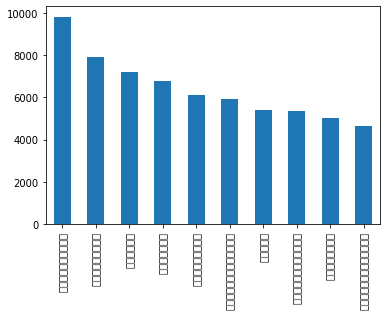

In [ ]:
datamart['จังหวัด'].value_counts().head(10).plot.bar()

จากข้อมูลพบว่าจังหวัดที่เสี่ยงเกิดอุบัติเหตุ
- อันดับที่ 1 คือ นครราชสีมา
- อันดับที่ 2 คือ เชียงใหม่
- อันดับที่ 3 คือ ชลบุรี

## 4.2 อยากรู้วันที่เกิดอุบัติเหตุมากที่สุด


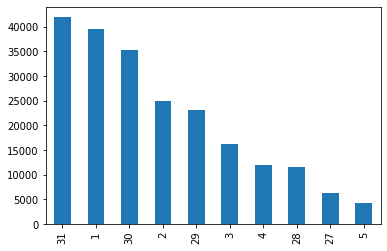

In [ ]:
datamart['วันที่เกิดเหตุ'].value_counts().head(10).plot.bar()

จากกราฟสรุปได้ว่า วันที่เกิดอุบัติเหตุสูงสุดคือช่วงคาบเกี่ยวระหว่างคืนขึ้นปีใหม่(วันที่ 31 ถึงวันที่ 1)

## 4.3 อยากรู้ช่วงเวลาที่เกิดอุบัติเหตุมากที่สุด


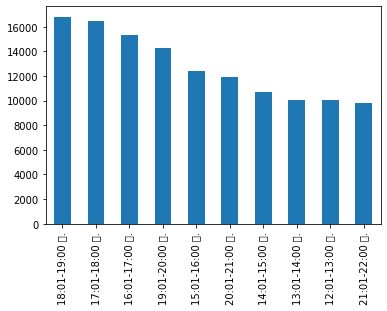

In [ ]:
datamart['เวลาเกิดเหตุ'].value_counts().head(10).plot.bar()

จากกราฟพบว่าช่วงเวลาที่เกิดอุบัติเหตุสูงสุดคือ
- อันดับที่ 1 ช่วง 18:01-19:00 น.
- อันดับที่ 2 ช่วง 17:01-18:00 น.
- อันดับที่ 3 ช่วง 16:01-17:00 น.

ช่วงเวลาที่เกิดอุบัติเหตุสูงสุดอยู่ในช่วงประมาณหัวค่ำ

## 4.4 อยากรู้ข้อมูลและสถานะของผู้ประสบอุบัติเหตุ

In [ ]:
datamart['สถานะ'].value_counts()

ผู้ชับขี่     149667
ผู้โดยสาร      55866
คนเดินเท้า      7410
ไม่ทราบ         2007
Name: สถานะ, dtype: int64

- จากข้อมูลพบว่าผู้ประสบอุบัติเหตุมากจากผู้ขับขี่เป็นอันดับ1
- จำนวนผู้โดยสารที่ประสบอุบัติเหตุมีจำนวนประมาณ 1 ใน 3 ของผู้ขับขี่
- ผู้ประสบอุบัติเหตุทางเท้ามีเพียง 3% เท่านั้น

## 4.5 ผู้ชายจะประสบอุบัติเหตุมากกว่าผู้หญิง ?


In [ ]:
datamart['เพศ'] = datamart['เพศ'].replace('ชาย','man')
datamart['เพศ'] = datamart['เพศ'].replace('หญิง','woman')
datamart['เพศ'].value_counts()

man      145146
woman     69804
Name: เพศ, dtype: int64

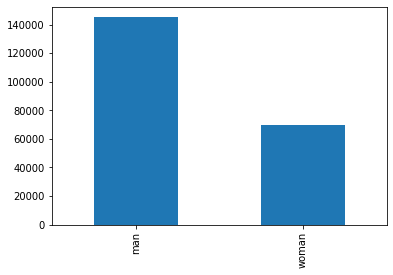

In [ ]:
datamart['เพศ'].value_counts().plot.bar()

- จากข้อมูลพบว่าผู้ชายจะประสบอุบัติเหตุมากกว่าผู้หญิง
- อัตราส่วนของผู้ประสบอุบัติเหตุเป็นผู้ชาย 67% และผู้หญิง 33%

# 5. ชุดคำถามใหม่หลังจากเห็นผลลัพธ์แรก

การเกิดอุบัติเหตุแต่ละครั้ง ผลการรักษามีทั้งเสียชีวิตและไม่เสียชีวิต ตรงนี้เราสามารถหาได้ว่าข้อมูลบางอย่างอาจส่งผลต่อความรุนแรงของอุบัติเหตุมากน้อยเพียงใด

## 5.1 อัตราการเสียชีวิตเทียบกับข้อมูลมาตรการ


In [ ]:
pd.crosstab(datamart['มาตรการ'],datamart['ผลการรักษา'], margins=True, margins_name='Overall', normalize='index')

ผลการรักษา,หาย,เสียชีวิต
มาตรการ,,
ใส่หมวก/เข็มขัด,0.991077,0.008923
ไม่ทราบ,0.933655,0.066345
ไม่ใส่,0.985557,0.014443
Overall,0.983419,0.016581


**สรุป**

ไม่ใส่อุปกรณ์นิรภัยมีอัตราการเสียชีวิต 1.44% ในขณะที่ใส่อุปกรณ์นิรภัยมีอัตราการเสียชีวิตเพียง 0.08% เท่านั้นจึงสรุปได้ว่าอุปกรณ์นิรภัยมีผลอย่างมากในการรักษาชีวิตผู้ประสบอุบัติเหตุ

## 5.2 อัตราการเสียชีวิตเทียบกับข้อมูลการดื่มสุรา

In [ ]:
pd.crosstab(datamart['การดื่มสุรา'],datamart['ผลการรักษา'], margins=True, margins_name='Overall', normalize='index')

ผลการรักษา,หาย,เสียชีวิต
การดื่มสุรา,,
ดื่ม,0.986012,0.013988
ไม่ดื่ม,0.992184,0.007816
ไม่ทราบ,0.885158,0.114842
Overall,0.983419,0.016581


**สรุป**

ผู้ที่ไม่ดื่มสุรามีอัตราการเสียชีวิตอยู่ที่ 0.78% และผู้ที่ดื่มสุรามีอัตราการเสียชีวิตอยู่ที่ 1.39% คิดเป็น 2 เท่าของอัตราผู้ที่ไม่ดื่มสุรา

จึงสรุปได้ว่า สุราเป็นสาเหตุสำคัญของการเสียชีวิต

## 5.3 อัตราการเสียชีวิตเทียบกับข้อมูลรถผู้บาดเจ็บ

In [ ]:
datamart['รถผู้บาดเจ็บ'].value_counts()

จักรยานยนต์       170992
ปิคอัพ             12902
รถจักรยาน           9814
ไม่มี/ล้มเอง        6474
รถเก๋ง/แท็กซี่      6150
อื่นๆ               2145
สามล้อเครื่อง       1906
ไม่ทราบ             1220
รถตู้               1102
รถโดยสารใหญ่         874
รถบรรทุก             651
รถโดยสาร 4 ล้อ       535
สามล้อถีบ            185
Name: รถผู้บาดเจ็บ, dtype: int64

จักรยานยนต์มีจำนวนการเกิดอุบัติเหตุสูงสุด แต่อัตราการเสียชีวิตอาจไม่ได้มีมากกว่ารถประเภทอื่นๆ

In [ ]:
pd.crosstab(datamart['รถผู้บาดเจ็บ'],datamart['ผลการรักษา'], margins=True, margins_name='Overall', normalize='index')

ผลการรักษา,หาย,เสียชีวิต
รถผู้บาดเจ็บ,,
จักรยานยนต์,0.986561,0.013439
ปิคอัพ,0.966982,0.033018
รถจักรยาน,0.985327,0.014673
รถตู้,0.980036,0.019964
รถบรรทุก,0.963134,0.036866
รถเก๋ง/แท็กซี่,0.966504,0.033496
รถโดยสาร 4 ล้อ,0.983178,0.016822
รถโดยสารใหญ่,0.985126,0.014874
สามล้อถีบ,0.989189,0.010811


**สรุป**

อัตราการเสียชีวิตของรถแต่ละประเภท
- อันดับ 1 รถบรรทุก 3.68%
- อันดับ 2 อื่นๆ 3.44%
- อันดับ 3 รถเก๋ง/แท็กซี่ 3.34%

รถจักรยานยนต์มีอัตราการเสียชีวิต 1.34% อยู่อันดับที่ 10 ของประเภทรถ

# 6. สรุป
- การทำ data analytic ข้อมูลการเกิดอุบัติเหตุมีประโยชน์อย่างมากแก่เจ้าหน้าที่ผู้ปฎิบัติงานในการเตรียมตัวรับมือ
- เราสามารถนำข้อมูลไปใช้เพื่อเตรียมการในปีถัดๆไปได้